In [29]:
import nibabel as nib
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
out_image_1 = nib.load(os.path.join('./results/combined_2/', 'niftis', 'combined_image_1_3'  + '.nii.gz')) 
out_label_1 = nib.load(os.path.join('./results/combined_2/', 'niftis', 'combined_label_1_3'  + '.nii.gz')) 
print(out_image_1.shape)

out_image_2 = nib.load(os.path.join('./results/combined_2/', 'niftis', 'combined_image_2_4'  + '.nii.gz')) 
out_label_2 = nib.load(os.path.join('./results/combined_2/', 'niftis', 'combined_label_2_4'  + '.nii.gz')) 

out_image_3 = nib.load(os.path.join('./results/combined_1/', 'niftis', 'combined_image_1_3'  + '.nii.gz')) 
out_label_3 = nib.load(os.path.join('./results/combined_1/', 'niftis', 'combined_label_1_3'  + '.nii.gz')) 
print(out_image_1.shape)

out_image_4 = nib.load(os.path.join('./results/combined_1/', 'niftis', 'combined_image_2_4'  + '.nii.gz')) 
out_label_4 = nib.load(os.path.join('./results/combined_1/', 'niftis', 'combined_label_2_4'  + '.nii.gz')) 


(128, 128, 32, 8)
(128, 128, 32, 8)


In [4]:

def show_subjects(one_image, slice=10, label=False):
    def show_slices(slices):
        " Function to dispay row of image slices"
        fig, axes = plt.subplots(1,len(slices), figsize=(30,15))
        for i, slice in enumerate(slices):
            # axes[i].imshow(slice.T, cmap='gray', origin='lower')
            if label:
#                 cmap= 'viridis'
                cmap= 'gray'
            else:
                cmap='gray'
            axes[i].imshow(slice.T, cmap=cmap)
            axes[i].axis('off')
        plt.tight_layout()
    
    frame = [0, 1, 2, 3, 4, 5, 6, 7]
    

    show_slices([ one_image[:,:,slice, frame[0]],one_image[:,:,slice, frame[1]],one_image[:,:, slice,frame[2]],one_image[:,:, slice,frame[3]],one_image[:,:, slice,frame[4]]
                 ,one_image[:,:, slice,frame[5]],one_image[:,:, slice,frame[6]],one_image[:,:,slice, frame[7]]])
    

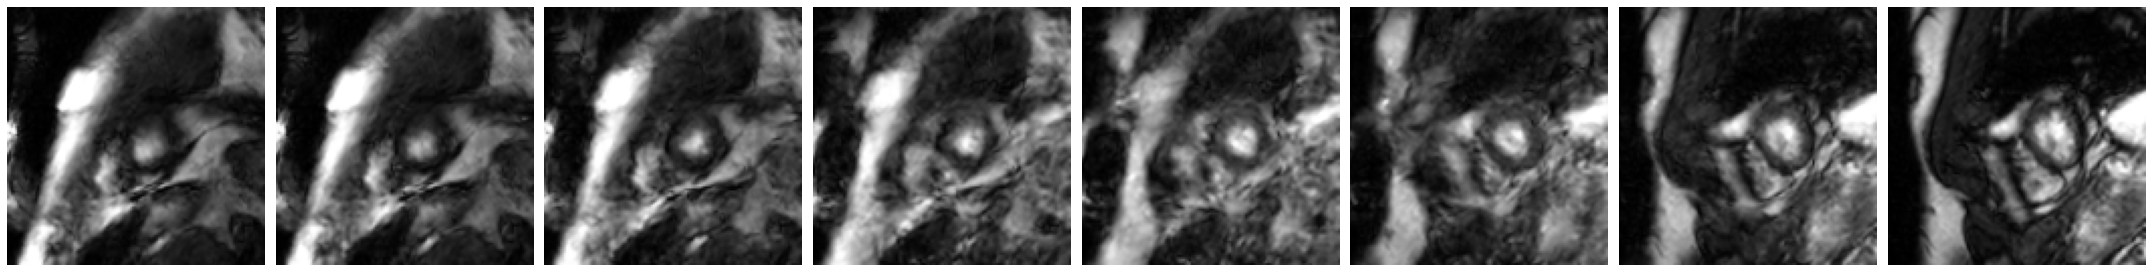

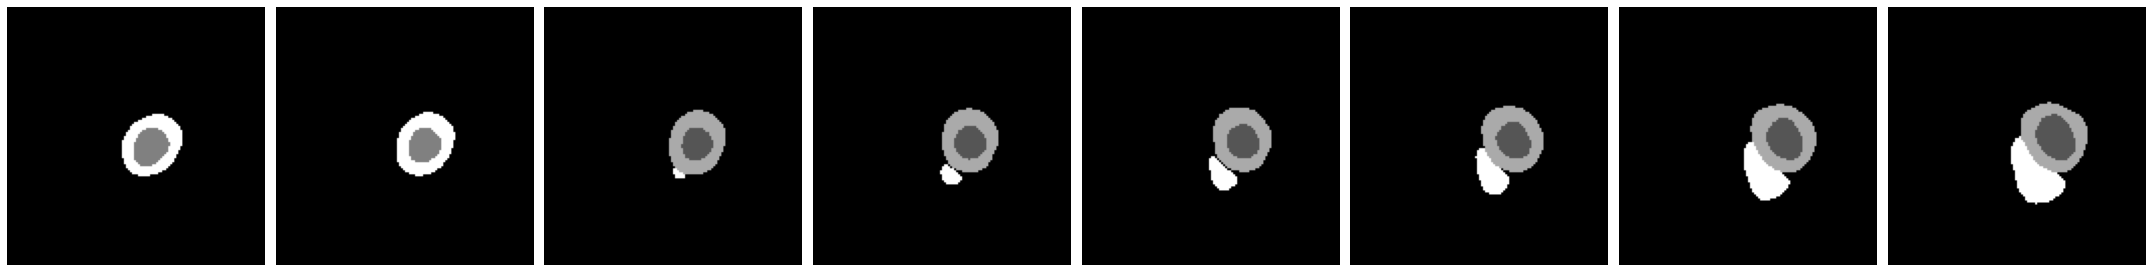

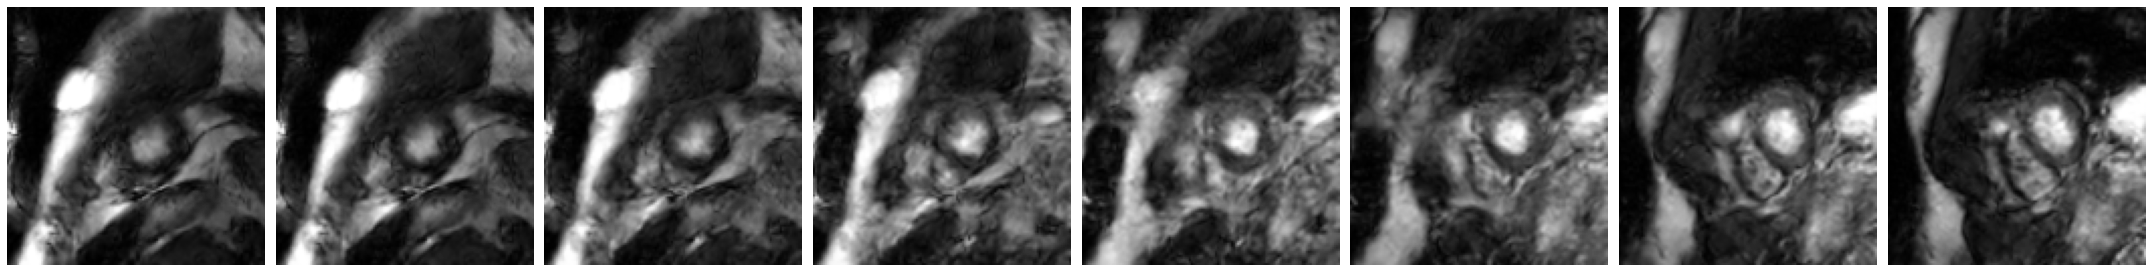

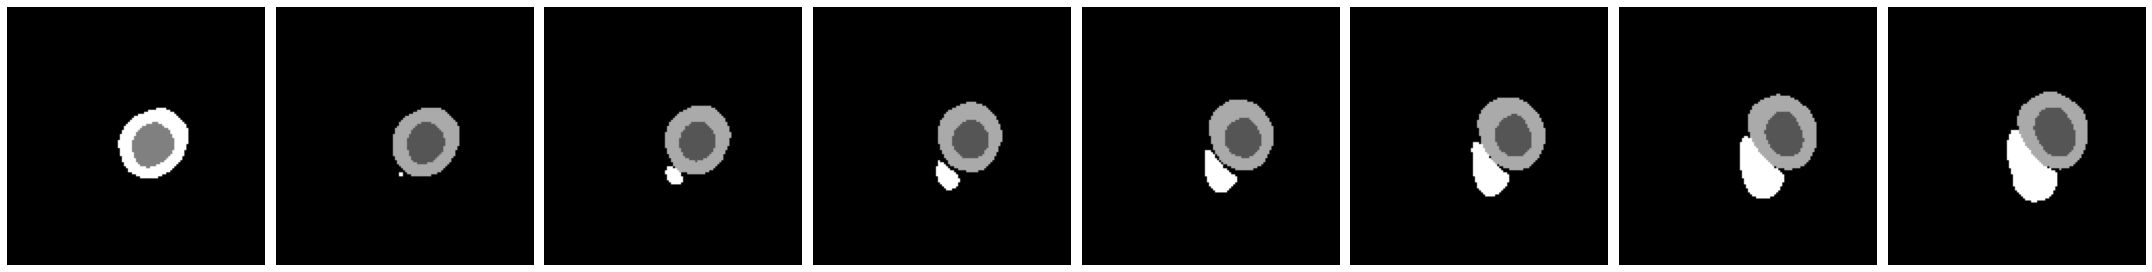

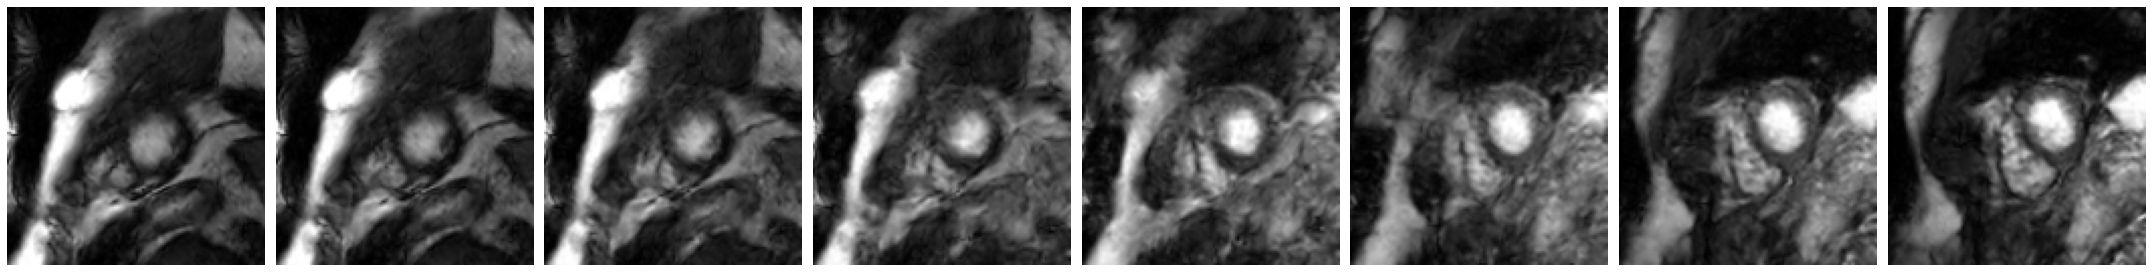

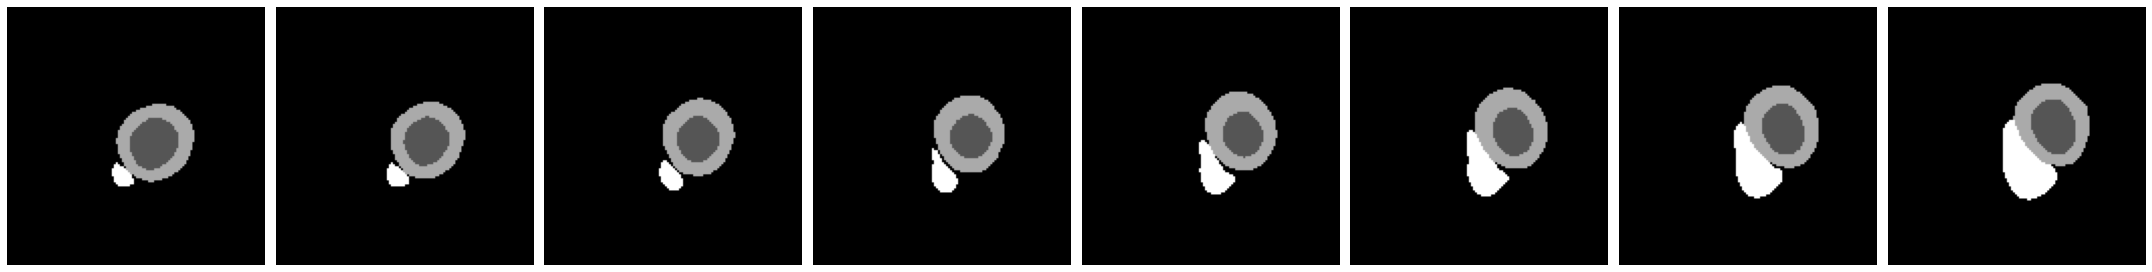

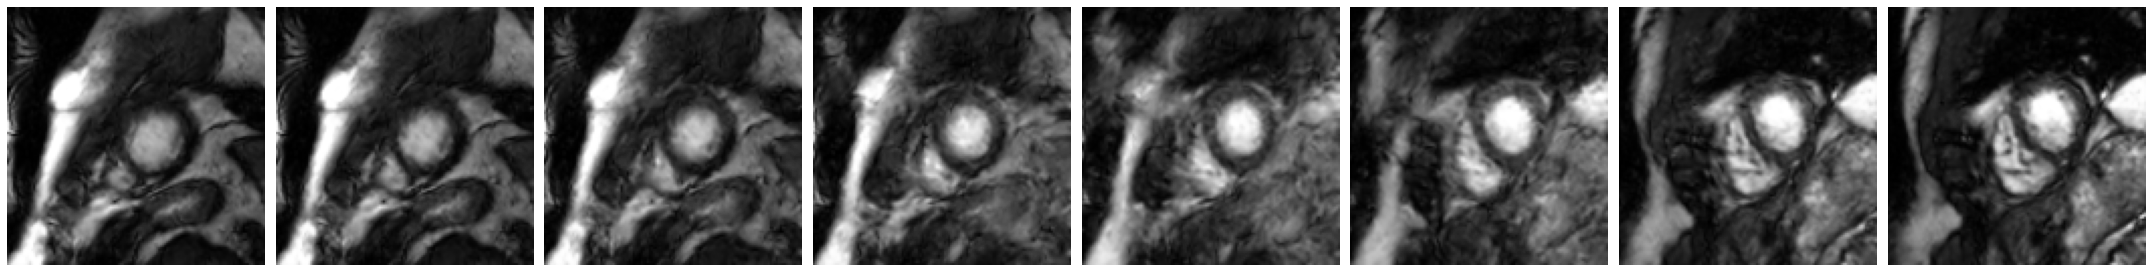

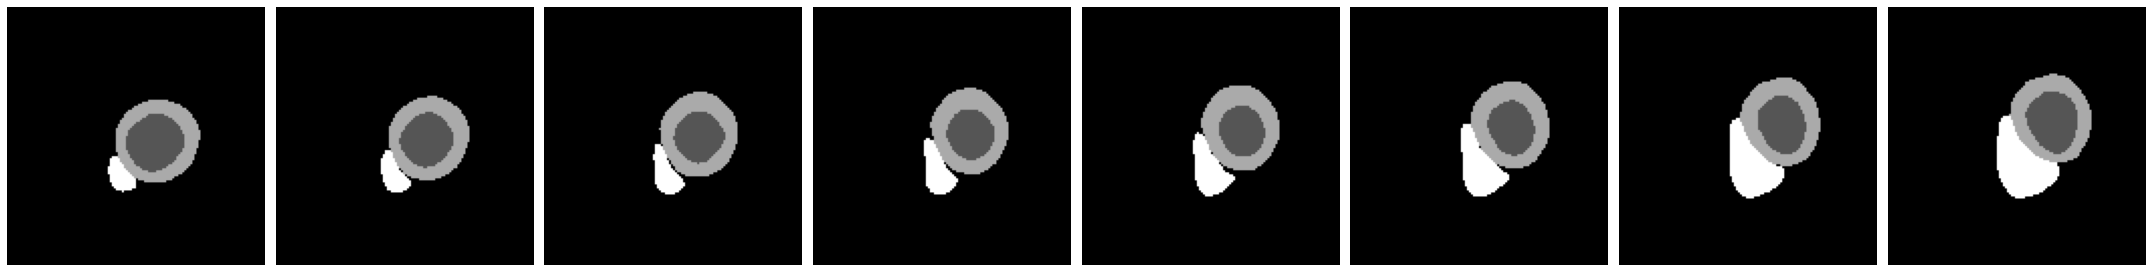

In [5]:
for slice in range(32):
    show_subjects(out_image_2.get_fdata(), slice=slice)
    show_subjects(out_label_2.get_fdata(), slice=slice, label=True)

In [19]:
# read all subjects with nibabel 
def reading_synthesized_data(main_path_data):
    
    image_list = sorted(os.listdir(os.path.join(main_path_data, 'test_latest/niftis/synthesized_image')))
    label_list = sorted(os.listdir(os.path.join(main_path_data, 'test_latest/niftis/input_label')))
    nib_subjects = {
    'image': [], 'image_path':[], 'label':[], 'label_path':[]}

    for image,label in zip(image_list, label_list):

        nib_subjects['image'].append(nib.load(os.path.join(main_path_data,'test_latest/niftis/synthesized_image', image)))
        nib_subjects['image_path'].append(os.path.join(main_path_data,'test_latest/niftis/synthesized_image', image))
        nib_subjects['label'].append(nib.load(os.path.join(main_path_data,'test_latest/niftis/input_label', label)))
        nib_subjects['label_path'].append(os.path.join(main_path_data,'test_latest/niftis/input_label', label))


    print('size of the first subject', nib_subjects['image'][0].shape, '\npath',nib_subjects['image_path'][0])
    print('size of the first subject', nib_subjects['label'][0].shape, '\npath',nib_subjects['label_path'][0])
    print('the data size is ', len(nib_subjects['image']))
    return nib_subjects

In [22]:
sub_1_3_nib = reading_synthesized_data('./results/mms1_VAE_Vendor_A_subjects_1_3/211011_cmr_mms1_noBA_NR_128/')
sub_2_4_nib = reading_synthesized_data('./results/mms1_VAE_Vendor_A_subjects_2_4/211011_cmr_mms1_noBA_NR_128/')
sub_1_3_1_nib = reading_synthesized_data('./results/mms1_VAE_Vendor_A_subjects_1_3_1/211011_cmr_mms1_noBA_NR_128/')
sub_2_4_1_nib = reading_synthesized_data('./results/mms1_VAE_Vendor_A_subjects_2_4_1/211011_cmr_mms1_noBA_NR_128/')


size of the first subject (128, 128, 32, 1) 
path ./results/mms1_VAE_Vendor_A_subjects_1_3/211011_cmr_mms1_noBA_NR_128/test_latest/niftis/synthesized_image/phase0A2C0I1_ED.nii.gz
size of the first subject (128, 128, 32, 1) 
path ./results/mms1_VAE_Vendor_A_subjects_1_3/211011_cmr_mms1_noBA_NR_128/test_latest/niftis/input_label/phase0A2C0I1_ED.nii.gz
the data size is  8
size of the first subject (128, 128, 32, 1) 
path ./results/mms1_VAE_Vendor_A_subjects_2_4/211011_cmr_mms1_noBA_NR_128/test_latest/niftis/synthesized_image/phase0A6D5F9_ED.nii.gz
size of the first subject (128, 128, 32, 1) 
path ./results/mms1_VAE_Vendor_A_subjects_2_4/211011_cmr_mms1_noBA_NR_128/test_latest/niftis/input_label/phase0A6D5F9_ED.nii.gz
the data size is  8
size of the first subject (128, 128, 32, 1) 
path ./results/mms1_VAE_Vendor_A_subjects_1_3_1/211011_cmr_mms1_noBA_NR_128/test_latest/niftis/synthesized_image/phase0A8C9U8_ED.nii.gz
size of the first subject (128, 128, 32, 1) 
path ./results/mms1_VAE_Vendor

In [66]:
def calculate_volumes(nib_subjects):
    how_many = 200000
    volumes_RV = np.zeros((len(nib_subjects['image']) ,), dtype=float)
    volumes_LV = np.zeros((len(nib_subjects['image']) ,), dtype=float)

    RV = 3

    LV = 1
#     MYO = 2

    for i in range(len(nib_subjects['image'])):
        if i >=how_many:
            break
        one_image_name = nib_subjects['image_path'][i].split("/")[-1]
        
        one_image = nib_subjects['image'][i]
        one_gt = nib_subjects['label'][i]
        one_image_np = one_image.get_fdata()
        one_gt_np = one_gt.get_fdata()
        
#         if tissue == 'all': # calculate the volume of the whole heart
#             label = 1
#             one_gt_np[one_gt_np==2]=1
#             one_gt_np[one_gt_np==3]=1

# 2.74 caclulated based on the average of the slice thickness of the subject after intra subject synthesis to 32 slices
        n_RV_RV = np.count_nonzero(np.round(one_gt_np)==RV)
#         vol_RV = np.round(n_RV_RV * one_image.header['pixdim'][1]* one_image.header['pixdim'][2]* one_image.header['pixdim'][3],1)/1000
        vol_RV = np.round(n_RV_RV * 1.5*1.5* 2.74,1)/1000
        volumes_RV[i]=vol_RV
        
        n_RV_LV = np.count_nonzero(np.round(one_gt_np)==LV)
#         vol_LV = np.round(n_RV_LV * one_image.header['pixdim'][1]* one_image.header['pixdim'][2]* one_image.header['pixdim'][3],1)/1000
        vol_LV = np.round(n_RV_LV * 1.5*1.5* 2.74,1)/1000
    
        volumes_LV[i]=vol_LV

    return volumes_RV, volumes_LV

In [109]:
def plot_volumes_hist_2D_list(nib_subjects_all_list, order_list = ['Example 1', 'Example 2', 'Example 3'] , name = 'inter_subject_RVLV_volume.png'):
    fig = plt.figure(figsize=(10, 6))
    grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.25)
    main_ax = fig.add_subplot(grid[:-1, 1:])
#     y_hist = fig.add_subplot(grid[:-1, 0], sharey=main_ax)
#     x_hist = fig.add_subplot(grid[-1, 1:], sharex=main_ax)
    for (nib_subjects, vendor) in zip(nib_subjects_all_list, order_list):
        
        volumes_ED, volumes_ES = calculate_volumes(nib_subjects)
        mean_ED = np.mean(volumes_ED[volumes_ED!=0])
        mean_ES = np.mean(volumes_ES[volumes_ES!=0])
        std_ED = np.std(volumes_ED[volumes_ED!=0])
        std_ES = np.std(volumes_ES[volumes_ES!=0])

        volumes_ED_nz = volumes_ED[volumes_ED!=0]
        volumes_ES_nz = volumes_ES[volumes_ES!=0]

        subjects = int(volumes_ED_nz.shape[0])
        x = np.linspace(0,subjects, subjects)

        
        

        if vendor == 'Example 1':
            marker = 'v'
            color = 'b'
        elif vendor == 'Example 2':
            marker = 'o'
            color = 'r'
        elif vendor == 'Example 3':
            marker = 's'
            color = 'g'
            
        
        
        main_ax.scatter(volumes_ES_nz ,volumes_ED_nz,color=color, marker = marker , label =vendor,alpha=0.5)
        n = ['Sub A','','','','','','','Sub B']
        for i, txt in enumerate(n):
            main_ax.annotate(txt, (volumes_ES_nz[i]-7 ,volumes_ED_nz[i]+2))
        


#         h_lim = int(570)
#         main_ax.set_ylim([1,h_lim])
#         main_ax.set_xlim([1,h_lim])
        main_ax.set_title('RV and LV Volumes',fontsize=14)
        main_ax.grid(False,linestyle='-',color='0.75')
        main_ax.set_ylabel("RV Volume (ml)",fontsize=14)
        main_ax.set_xlabel("LV Volume (ml)",fontsize=14)

#         y_hist.hist(volumes_ED[volumes_ED!=0], 40, facecolor=color, alpha=0.3,histtype='stepfilled',orientation='horizontal')

#         y_hist.grid(False,linestyle='-',color='0.75')
#         x_hist.grid(False,linestyle='-',color='0.75')
#         x_hist.hist(volumes_ES[volumes_ES!=0], 40, facecolor=color, alpha=0.3,histtype='stepfilled',orientation='vertical')
#         y_hist.set_ylabel("RV Volume (ml)",fontsize=14)
#         x_hist.set_xlabel("LV Volume (ml)",fontsize=14)

#         y_hist.invert_xaxis()
        
    main_ax.legend( loc ="upper right",fontsize=14)
    plt.savefig(name, dpi=600)
    plt.show()



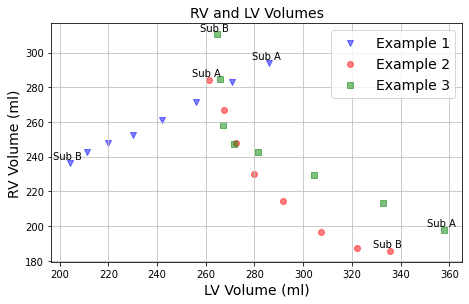

In [110]:
nib_subjects_all_list = [sub_1_3_1_nib, sub_2_4_1_nib, sub_2_4_nib ]

plot_volumes_hist_2D_list( nib_subjects_all_list ,name = 'inter_subject_RVLV_volume.png')